In [7]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [33]:
weight_to_int = {"1.50":0, "2.00":1, '3.00':2, '4.00':3, '5.00':4, '6.00':5, '7.00':6, '8.00':7, '9.00':8, '10.00':9}
int_to_alg = {0:'WA*', 1:'pwXD', 2:'pwXU', 3:'XDP', 4:'XUP', 5:'DSMAP'}

### The following Code Creates Box Plots.
#### one plot for each weight, each containing #policies boxes.

In [47]:
##Experiment 5: Created the box plots. Each plot, y-axis:work and x-axis:algs, for one weight.
numPolicies = 6
fileName = 'STP'
Weights = {"1.50":[], "2.00":[], '3.00':[], '4.00':[], '5.00':[], '6.00':[], '7.00':[], '8.00':[], '9.00':[], '10.00':[]}
for w in Weights.values():
    for i in range(numPolicies):
        a = []
        w.append(a)

cnt = 0
with open("./results/"+fileName+"-results.txt", "r") as f:
    numLines = len(f.readlines())
with open("./results/"+fileName+"-results.txt", "r") as f:
    for line in f:
        data = line.split()
        if(len(data)): ## To check for empy lines
            if data[0] == "MAP" : #and data[5]!='0' and data[5]!='1' and data[5]!='6' and data[5]!='8':# and data[9]!='0':
                # np.append(Weights[data[7]][int(data[5])],(int(data[9])))
                Weights[data[7]][int(data[5])].append(int(data[9]))
            if data[0] == "STP" : #and data[3]!='0' and data[3]!='1' and data[3]!='6' and data[3]!='8': # and data[9]!='0':
                # np.append(Weights[data[7]][int(data[5])],(int(data[9])))
                Weights[data[5]][int(data[3])].append(int(data[7]))

        cnt += 1
        if cnt/numLines*100 % 5 == 0:
            print(cnt/numLines*100, '%')
print("Done Reading the Data..")

5.0 %
10.0 %
15.0 %
20.0 %
25.0 %
30.0 %
35.0 %
40.0 %
45.0 %
50.0 %
60.0 %
65.0 %
70.0 %
75.0 %
80.0 %
85.0 %
90.0 %
95.0 %
100.0 %
Done Reading the Data..


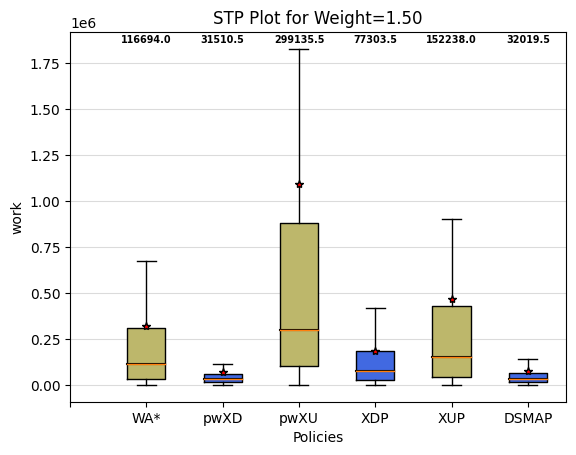

Box information:
 Policy WA*
 median 116694.0
 upper_quartile 312157.5
 lower_quartile 30879.25
 upper_whisker 675746
 lower_whisker 654

 Policy pwXD
 median 31510.5
 upper_quartile 57801.5
 lower_quartile 17160.5
 upper_whisker 112771
 lower_whisker 1277

 Policy pwXU
 median 299135.5
 upper_quartile 881672.5
 lower_quartile 104612.75
 upper_whisker 1829281
 lower_whisker 2532

 Policy XDP
 median 77303.5
 upper_quartile 183341.75
 lower_quartile 25571.5
 upper_whisker 417075
 lower_whisker 973

 Policy XUP
 median 152238.0
 upper_quartile 431706.0
 lower_quartile 44676.0
 upper_whisker 906028
 lower_whisker 1289

 Policy DSMAP
 median 32019.5
 upper_quartile 67615.5
 lower_quartile 18172.5
 upper_whisker 139821
 lower_whisker 1837



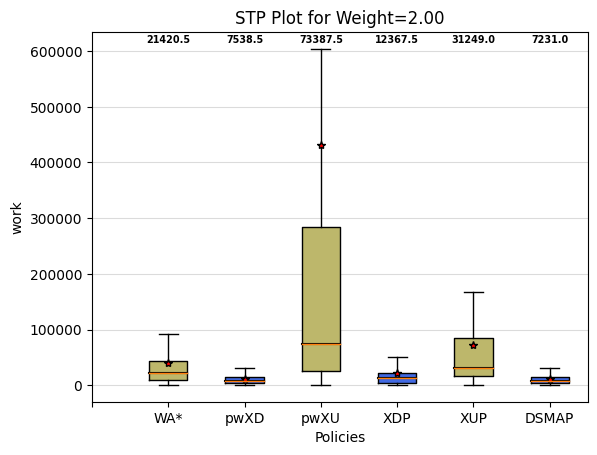

Box information:
 Policy WA*
 median 21420.5
 upper_quartile 44074.0
 lower_quartile 9905.75
 upper_whisker 91398
 lower_whisker 809

 Policy pwXD
 median 7538.5
 upper_quartile 15235.25
 lower_quartile 3408.25
 upper_whisker 31494
 lower_whisker 1107

 Policy pwXU
 median 73387.5
 upper_quartile 284832.5
 lower_quartile 25750.75
 upper_whisker 603984
 lower_whisker 1173

 Policy XDP
 median 12367.5
 upper_quartile 22692.25
 lower_quartile 3851.25
 upper_whisker 50275
 lower_whisker 454

 Policy XUP
 median 31249.0
 upper_quartile 85619.0
 lower_quartile 16505.25
 upper_whisker 167867
 lower_whisker 744

 Policy DSMAP
 median 7231.0
 upper_quartile 15469.75
 lower_quartile 3297.5
 upper_whisker 31437
 lower_whisker 850



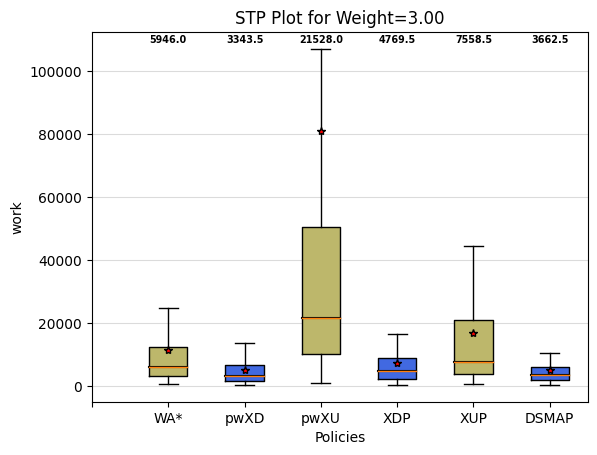

Box information:
 Policy WA*
 median 5946.0
 upper_quartile 12524.5
 lower_quartile 3238.5
 upper_whisker 24644
 lower_whisker 546

 Policy pwXD
 median 3343.5
 upper_quartile 6580.0
 lower_quartile 1697.75
 upper_whisker 13545
 lower_whisker 401

 Policy pwXU
 median 21528.0
 upper_quartile 50549.0
 lower_quartile 10060.25
 upper_whisker 106938
 lower_whisker 887

 Policy XDP
 median 4769.5
 upper_quartile 8828.75
 lower_quartile 2221.75
 upper_whisker 16526
 lower_whisker 376

 Policy XUP
 median 7558.5
 upper_quartile 20811.5
 lower_quartile 3802.75
 upper_whisker 44334
 lower_whisker 709

 Policy DSMAP
 median 3662.5
 upper_quartile 6105.5
 lower_quartile 1911.0
 upper_whisker 10544
 lower_whisker 401



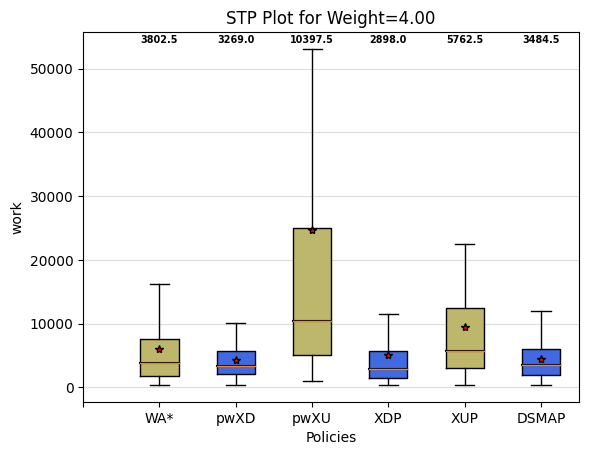

Box information:
 Policy WA*
 median 3802.5
 upper_quartile 7569.5
 lower_quartile 1750.5
 upper_whisker 16236
 lower_whisker 372

 Policy pwXD
 median 3269.0
 upper_quartile 5629.0
 lower_quartile 2070.25
 upper_whisker 10149
 lower_whisker 438

 Policy pwXU
 median 10397.5
 upper_quartile 25051.0
 lower_quartile 5143.25
 upper_whisker 53104
 lower_whisker 960

 Policy XDP
 median 2898.0
 upper_quartile 5697.25
 lower_quartile 1530.75
 upper_whisker 11569
 lower_whisker 402

 Policy XUP
 median 5762.5
 upper_quartile 12459.75
 lower_quartile 3091.75
 upper_whisker 22556
 lower_whisker 430

 Policy DSMAP
 median 3484.5
 upper_quartile 5986.25
 lower_quartile 1924.75
 upper_whisker 11949
 lower_whisker 429



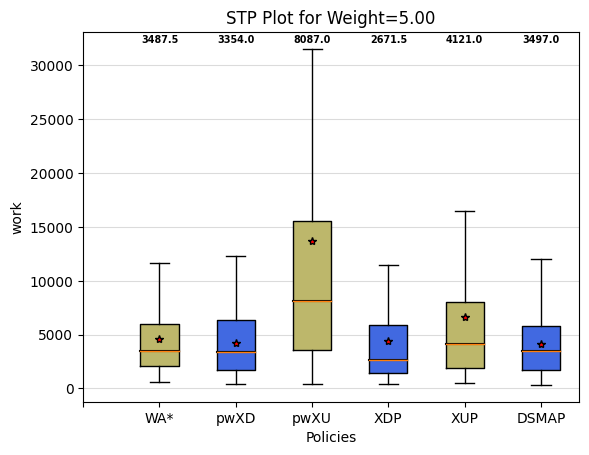

Box information:
 Policy WA*
 median 3487.5
 upper_quartile 6012.75
 lower_quartile 2074.25
 upper_whisker 11635
 lower_whisker 635

 Policy pwXD
 median 3354.0
 upper_quartile 6388.0
 lower_quartile 1760.75
 upper_whisker 12330
 lower_whisker 382

 Policy pwXU
 median 8087.0
 upper_quartile 15532.25
 lower_quartile 3574.5
 upper_whisker 31538
 lower_whisker 442

 Policy XDP
 median 2671.5
 upper_quartile 5903.75
 lower_quartile 1458.5
 upper_whisker 11427
 lower_whisker 440

 Policy XUP
 median 4121.0
 upper_quartile 8047.5
 lower_quartile 1889.25
 upper_whisker 16447
 lower_whisker 545

 Policy DSMAP
 median 3497.0
 upper_quartile 5837.5
 lower_quartile 1704.25
 upper_whisker 12035
 lower_whisker 330



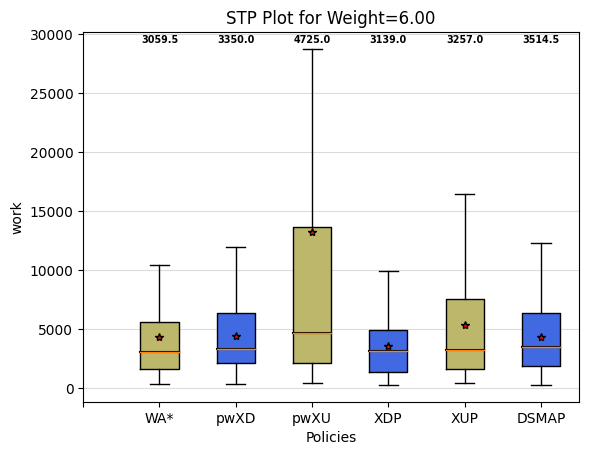

Box information:
 Policy WA*
 median 3059.5
 upper_quartile 5588.25
 lower_quartile 1646.75
 upper_whisker 10467
 lower_whisker 400

 Policy pwXD
 median 3350.0
 upper_quartile 6367.5
 lower_quartile 2116.25
 upper_whisker 11974
 lower_whisker 391

 Policy pwXU
 median 4725.0
 upper_quartile 13689.5
 lower_quartile 2127.0
 upper_whisker 28727
 lower_whisker 433

 Policy XDP
 median 3139.0
 upper_quartile 4981.5
 lower_quartile 1420.25
 upper_whisker 9929
 lower_whisker 300

 Policy XUP
 median 3257.0
 upper_quartile 7609.5
 lower_quartile 1689.0
 upper_whisker 16454
 lower_whisker 436

 Policy DSMAP
 median 3514.5
 upper_quartile 6381.25
 lower_quartile 1894.5
 upper_whisker 12298
 lower_whisker 331



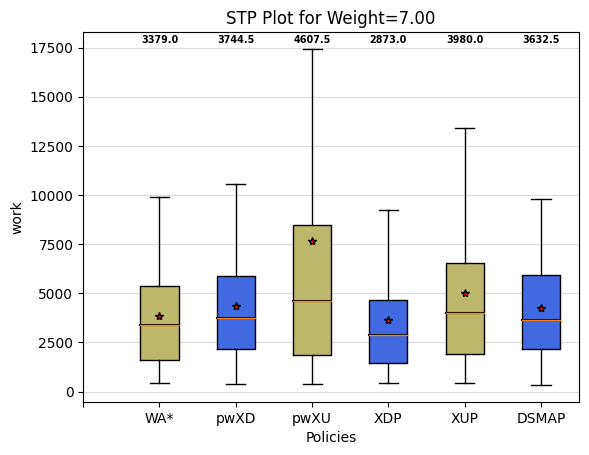

Box information:
 Policy WA*
 median 3379.0
 upper_quartile 5363.5
 lower_quartile 1613.0
 upper_whisker 9914
 lower_whisker 423

 Policy pwXD
 median 3744.5
 upper_quartile 5881.25
 lower_quartile 2138.5
 upper_whisker 10559
 lower_whisker 402

 Policy pwXU
 median 4607.5
 upper_quartile 8477.25
 lower_quartile 1844.5
 upper_whisker 17435
 lower_whisker 378

 Policy XDP
 median 2873.0
 upper_quartile 4642.5
 lower_quartile 1437.25
 upper_whisker 9251
 lower_whisker 422

 Policy XUP
 median 3980.0
 upper_quartile 6540.75
 lower_quartile 1928.5
 upper_whisker 13429
 lower_whisker 412

 Policy DSMAP
 median 3632.5
 upper_quartile 5932.25
 lower_quartile 2138.5
 upper_whisker 9775
 lower_whisker 335



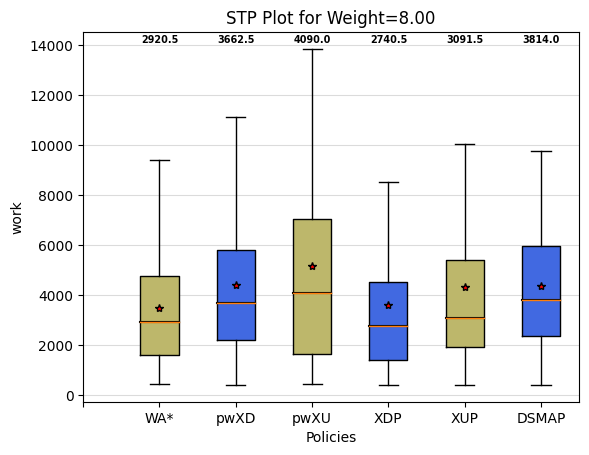

Box information:
 Policy WA*
 median 2920.5
 upper_quartile 4751.5
 lower_quartile 1595.0
 upper_whisker 9404
 lower_whisker 423

 Policy pwXD
 median 3662.5
 upper_quartile 5795.0
 lower_quartile 2205.0
 upper_whisker 11119
 lower_whisker 407

 Policy pwXU
 median 4090.0
 upper_quartile 7022.5
 lower_quartile 1634.75
 upper_whisker 13838
 lower_whisker 419

 Policy XDP
 median 2740.5
 upper_quartile 4531.0
 lower_quartile 1411.5
 upper_whisker 8509
 lower_whisker 412

 Policy XUP
 median 3091.5
 upper_quartile 5393.75
 lower_quartile 1914.75
 upper_whisker 10055
 lower_whisker 400

 Policy DSMAP
 median 3814.0
 upper_quartile 5975.0
 lower_quartile 2340.0
 upper_whisker 9754
 lower_whisker 407



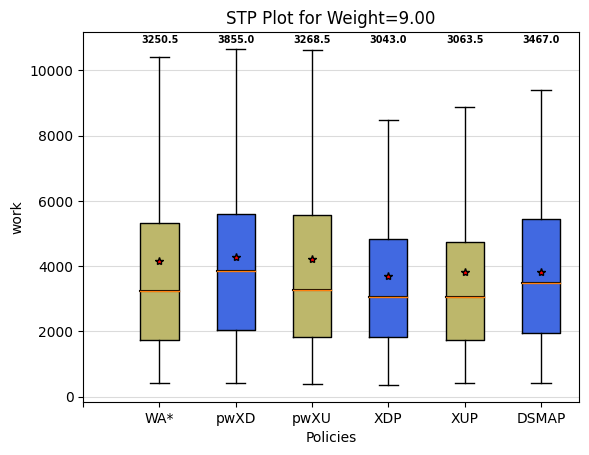

Box information:
 Policy WA*
 median 3250.5
 upper_quartile 5310.25
 lower_quartile 1738.0
 upper_whisker 10416
 lower_whisker 412

 Policy pwXD
 median 3855.0
 upper_quartile 5596.0
 lower_quartile 2055.25
 upper_whisker 10659
 lower_whisker 407

 Policy pwXU
 median 3268.5
 upper_quartile 5569.25
 lower_quartile 1832.25
 upper_whisker 10620
 lower_whisker 394

 Policy XDP
 median 3043.0
 upper_quartile 4817.75
 lower_quartile 1828.75
 upper_whisker 8475
 lower_whisker 356

 Policy XUP
 median 3063.5
 upper_quartile 4736.75
 lower_quartile 1744.75
 upper_whisker 8886
 lower_whisker 412

 Policy DSMAP
 median 3467.0
 upper_quartile 5435.25
 lower_quartile 1945.25
 upper_whisker 9390
 lower_whisker 407



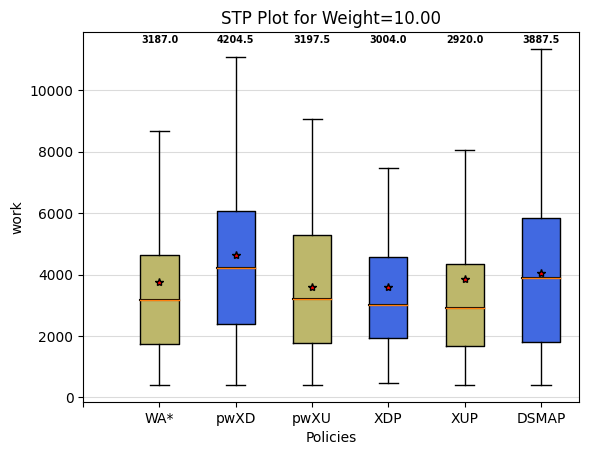

Box information:
 Policy WA*
 median 3187.0
 upper_quartile 4636.0
 lower_quartile 1742.25
 upper_whisker 8688
 lower_whisker 412

 Policy pwXD
 median 4204.5
 upper_quartile 6082.25
 lower_quartile 2394.25
 upper_whisker 11095
 lower_whisker 407

 Policy pwXU
 median 3197.5
 upper_quartile 5303.25
 lower_quartile 1780.25
 upper_whisker 9062
 lower_whisker 418

 Policy XDP
 median 3004.0
 upper_quartile 4566.5
 lower_quartile 1945.25
 upper_whisker 7472
 lower_whisker 481

 Policy XUP
 median 2920.0
 upper_quartile 4350.25
 lower_quartile 1662.75
 upper_whisker 8064
 lower_whisker 406

 Policy DSMAP
 median 3887.5
 upper_quartile 5841.75
 lower_quartile 1814.25
 upper_whisker 11347
 lower_whisker 407



In [48]:
for w in range(len(Weights.values())):
    data = []
    for alg in list(Weights.values())[w]:
        data.append(np.array(alg))

    fig, ax = plt.subplots()

    bp = ax.boxplot(data, showfliers=False, notch=False, sym='+', vert=True, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.8)
    ax.set(
        axisbelow=True,  # Hide the grid behind plot objects
        title=fileName + ' Plot for Weight=' + list(Weights.keys())[w],
        xlabel='Policies',
        ylabel='work',
    )

    box_colors = ['darkkhaki', 'royalblue']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax.plot(np.average(med.get_xdata()), np.average(data[i]),
                color='r', marker='*', markeredgecolor='k')
        
    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    pos = np.arange(num_boxes) + 1
    upper_labels = [str(round(s, 2)) for s in medians]
    thickness = ['bold', 'semibold']
    for tick, label in zip(range(num_boxes), ax.get_xticklabels()):

        ax.text(pos[tick], .97, upper_labels[tick],
                transform=ax.get_xaxis_transform(), weight=thickness[1],
                horizontalalignment='center', size='x-small')

    y_pos = np.arange(len(int_to_alg.values())+1)
    labels = ['']
    labels += list(int_to_alg.values())
    plt.xticks(y_pos, labels)

    plt.show()
    print('Box information:')
    for alg in range(len(data)):
        median = np.median(data[alg])
        upper_quartile = np.percentile(data[alg], 75)
        lower_quartile = np.percentile(data[alg], 25)

        iqr = upper_quartile - lower_quartile
        upper_whisker = data[alg][data[alg]<=upper_quartile+1.5*iqr].max()
        lower_whisker = data[alg][data[alg]>=lower_quartile-1.5*iqr].min()

        print(' Policy '+int_to_alg[alg])
        print(' median', median)
        print(' upper_quartile', upper_quartile)
        print(' lower_quartile', lower_quartile)
        print(' upper_whisker', upper_whisker)
        print(' lower_whisker', lower_whisker)
        print()
    print('====================================')